# Cluster Analysis 

This notebook prototypes the cluster analysis visualizers that I'm currently putting together.

**NOTE**: Currently I'm using the sklearn `make_blobs` function to create test datasets with specific numbers of clusters. However, in order to add this to the documentation, we should add a real dataset. 

In [1]:
%load_ext lab_black

In [2]:
import numpy as np
import yellowbrick as yb
import matplotlib.pyplot as plt

%matplotlib inline

from functools import partial
from sklearn.datasets import make_blobs as sk_make_blobs
from sklearn.datasets import make_circles, make_moons

In [3]:
# Helpers for easy dataset creation
N_SAMPLES = 1000
N_FEATURES = 12
SHUFFLE = True

# Make blobs partial
make_blobs = partial(
    sk_make_blobs, n_samples=N_SAMPLES, n_features=N_FEATURES, shuffle=SHUFFLE
)

## Elbow Method 

This method runs multiple clustering instances and computes the average silhoutte score for each K. Model selection works by selecting the K that is the "elbow" of a curve that looks like an arm. 

In [4]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

### 8 Blobs Dataset 

This series shows the use of different metrics with a dataset that does contain centers

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


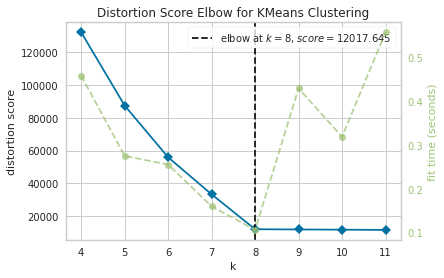

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
## Make 8 blobs dataset
X, y = make_blobs(centers=8)
visualizer = KElbowVisualizer(KMeans(), k=(4, 12))
visualizer.fit(X)
visualizer.show()

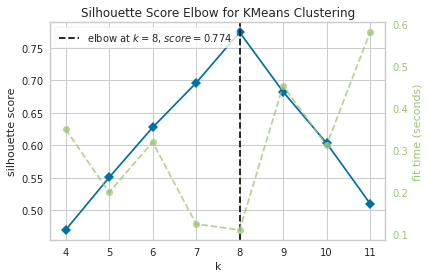

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [6]:
visualizer = KElbowVisualizer(KMeans(), k=(4, 12), metric="silhouette")
visualizer.fit(X)
visualizer.show()

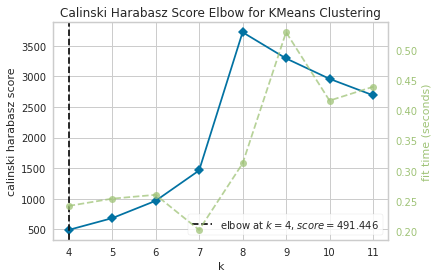

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [7]:
visualizer = KElbowVisualizer(KMeans(), k=(4, 12), metric="calinski_harabasz")
visualizer.fit(X)
visualizer.show()

### Datasets without Centers

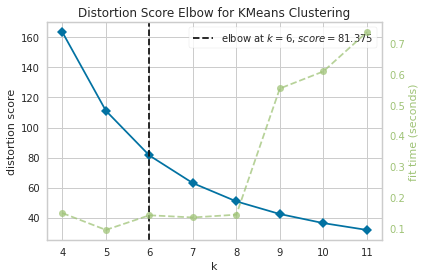

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
## Make cicles dataset
X, y = make_circles(n_samples=N_SAMPLES)
visualizer = KElbowVisualizer(KMeans(), k=(4, 12))
visualizer.fit(X)
visualizer.show()

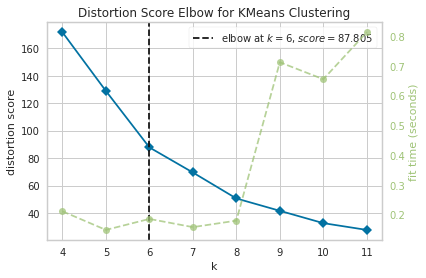

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
## Make moons dataset
X, y = make_moons(n_samples=N_SAMPLES)
visualizer = KElbowVisualizer(KMeans(), k=(4, 12))
visualizer.fit(X)
visualizer.show()

## Silhouette Score 

Visualizer using the silhouette score metric 

In [10]:
from yellowbrick.cluster import SilhouetteVisualizer

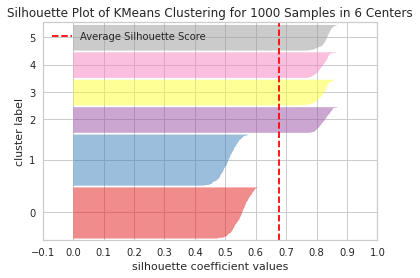

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1000 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [11]:
## Make 8 blobs dataset
X, y = make_blobs(centers=8)
visualizer = SilhouetteVisualizer(KMeans(6))
visualizer.fit(X)
visualizer.show()

## Intercluster Distance Map

In [12]:
def prop_to_size(prop, mi=0, ma=5, power=0.5):
    """
    Scale a property to be used as a size
    """
    prop = np.asarray(prop)

    return mi + (ma - mi) * (((prop - prop.min()) / (prop.max() - prop.min())) ** power)

In [13]:
from sklearn.manifold import MDS

## Make 12 blobs dataset
X, y = make_blobs(centers=12)

## Fit KMeans model on dataset
model = KMeans(9).fit(X)

<AxesSubplot:title={'center':'Intercluster Distance Map (via Multidimensional Scaling)'}, xlabel='PC2', ylabel='PC1'>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


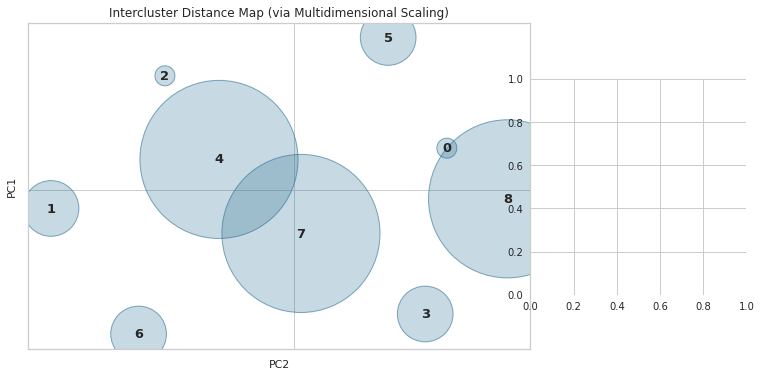

In [14]:
from matplotlib.lines import Line2D


def intercluster_distance(model, ax=None):
    # Create the figure if an axes isn't passed in
    if ax is None:
        fig, ax = plt.subplots(figsize=(9, 6))
    else:
        fig = plt.gcf()

    ## Get centers
    ## TODO: is this how sklearn stores centers in all models?
    C = model.cluster_centers_

    ## Compute the sizes of the clusters
    scores = np.bincount(model.predict(X))
    size = prop_to_size(scores, 400, 25000)

    ## Use MDS to plot centers
    Cm = MDS().fit_transform(C)
    ax.scatter(
        Cm[:, 0], Cm[:, 1], s=size, c="#2e719344", edgecolor="#2e719399", linewidth=1
    )

    ## Annotate the clustes with their labels
    for i, pt in enumerate(Cm):
        ax.text(
            s=str(i),
            x=pt[0],
            y=pt[1],
            va="center",
            ha="center",
            fontweight="bold",
            size=13,
        )

    ## Set the title
    ax.set_title("Intercluster Distance Map (via Multidimensional Scaling)")

    # Create origin grid
    ax.set_xticks([0])
    ax.set_yticks([0])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlabel("PC2")
    ax.set_ylabel("PC1")

    # Create a regular legend with target "size" descriptor
    #     handles = tuple([
    #         Line2D([0], [0], color="none", marker="o", markersize=i, markerfacecolor='none', markeredgecolor="#999999", markeredgewidth=1, markevery=i)
    #         for i in [3,9,18]
    #     ])
    #     ax.legend([handles], ['membership',], loc='best')

    # Create the size legend on an inner axes
    lax = fig.add_axes([0.9, 0.25, 0.3333, 0.5], frameon=False, facecolor="none")
    # make_size_legend(scores, size, lax)

    return ax


intercluster_distance(model)

In [15]:
from matplotlib.patches import Circle


def make_size_legend(scores, areas, ax=None):
    # Create the figure if an axes isn't passed in
    if ax is None:
        _, ax = plt.subplots()

    ## Compute the sizes of the clusters
    radii = np.sqrt(areas / np.pi)
    scaled = np.interp(radii, (radii.min(), radii.max()), (0.1, 1))
    print(size, radii)

    # Compute the locations of the 25th, 50th, and 75th percentiles of the score
    indices = np.array(
        [
            np.where(scores == np.percentile(scores, p, interpolation="nearest"))[0][0]
            for p in (25, 50, 75)
        ]
    )

    # Draw circles with their various sizes
    for idx in indices:
        center = (-0.30, 1 - scaled[idx])
        c = Circle(
            center,
            scaled[idx],
            facecolor="none",
            edgecolor="#2e7193",
            linewidth=1.5,
            linestyle="--",
            label="bob",
        )
        ax.add_patch(c)

        ax.annotate(
            scores[idx],
            (-0.30, 1 - (2 * scaled[idx])),
            xytext=(1, 1 - (2 * scaled[idx])),
            arrowprops=dict(arrowstyle="wedge", color="#2e7193"),
            va="center",
            ha="center",
        )

    # Draw size legend title
    ax.text(s="membership", x=0, y=1.2, va="center", ha="center")

    ax.set_xlim(-1.4, 1.4)
    ax.set_ylim(-1.4, 1.4)
    ax.set_xticks([])
    ax.set_yticks([])
    for name in ax.spines:
        ax.spines[name].set_visible(False)

    ax.grid(False)

    return ax